# Import module and data
---

In [1]:
import os
import numpy as np
import pandas as pd
import datetime as datetime

# !pip install wfdb
import wfdb # Waveform Database Software Package (WFDB) for Python
import ast

In [2]:
my_path = os.getcwd()
path = '/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_XL'
my_dir = '/home/ubuntu/dr-you-ecg-20220420_mount/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'

# Preprocess
---
### (1) load data

In [177]:
df_total = pd.read_csv('/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_XL/PTB_label_total.csv')
df_Y = df_total[['patient_id', 'age', 'sex','height', 'weight', 'recording_date', 'scp_codes', 'diagnosis', 'filename_lr', ]]
df_Y.reset_index(drop=True, inplace=True)
df_Y

In [12]:
df_total.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'diagnostic_superclass', 'diagnosis'],
      dtype='object')

---
### (2) make the label table

In [13]:
# replace '/' to '_' (string '/' causes syntax error) : 21837
# remove data which have uncertain diagnosis or rhythm (only leave 100% likelihood) : 17903
scp_list = []
score_list = []
for i in range(len(df_Y)):
    scp_dict =df_Y.at[i,'scp_codes']
    scp_dict = ast.literal_eval(scp_dict)
    key_list = []
    val_list = []
    for key, value in scp_dict.items():
        if value != 0:
            if "/" in key:
                key = key.replace('/','_')
            key_list.append(key)
            val_list.append(value)
    scp_list.append(key_list)
    score_list.append(val_list)
    


/tmp/ipykernel_3413/2776834220.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Y['confirm_state'] = scp_list


,patient_id,age,sex,height,weight,recording_date,scp_codes,diagnosis,filename_lr,confirm_state
0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",['NORM'],records100/00000/00001_lr,[NORM]
1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,"{'NORM': 80.0, 'SBRAD': 0.0}",['NORM'],records100/00000/00002_lr,[NORM]
2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00003_lr,[NORM]
3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00004_lr,[NORM]
4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00005_lr,[NORM]
...,...,...,...,...,...,...,...,...,...,...
21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",['NDT'],records100/21000/21833_lr,"[NDT, PVC]"
21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",['NORM'],records100/21000/21834_lr,[NORM]
21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,"{'ISCAS': 50.0, 'SR': 0.0}",['ISCAS'],records100/21000/21835_lr,[ISCAS]
21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/21000/21836_lr,[NORM]


In [14]:
full_index = []
for i in range(len(df_Y)):
    val_list = df_Y.iloc[i]['confirm_state']
    if len(val_list) != 0:
        full_index.append(i)

df_Y = df_Y.loc[full_index]
df_Y = df_Y.reset_index(drop=True)
df_Y

,patient_id,age,sex,height,weight,recording_date,scp_codes,diagnosis,filename_lr,confirm_state
0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",['NORM'],records100/00000/00001_lr,[NORM]
1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,"{'NORM': 80.0, 'SBRAD': 0.0}",['NORM'],records100/00000/00002_lr,[NORM]
2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00003_lr,[NORM]
3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00004_lr,[NORM]
4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00005_lr,[NORM]
...,...,...,...,...,...,...,...,...,...,...
21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",['NDT'],records100/21000/21833_lr,"[NDT, PVC]"
21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",['NORM'],records100/21000/21834_lr,[NORM]
21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,"{'ISCAS': 50.0, 'SR': 0.0}",['ISCAS'],records100/21000/21835_lr,[ISCAS]
21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/21000/21836_lr,[NORM]


In [15]:
df_Y = df_Y.drop(['height', 'weight', 'diagnosis'], axis=1)
df_Y

,patient_id,age,sex,recording_date,scp_codes,filename_lr,confirm_state
0,15709.0,56.0,1,1984-11-09 09:17:34,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records100/00000/00001_lr,[NORM]
1,13243.0,19.0,0,1984-11-14 12:55:37,"{'NORM': 80.0, 'SBRAD': 0.0}",records100/00000/00002_lr,[NORM]
2,20372.0,37.0,1,1984-11-15 12:49:10,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00003_lr,[NORM]
3,17014.0,24.0,0,1984-11-15 13:44:57,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00004_lr,[NORM]
4,17448.0,19.0,1,1984-11-17 10:43:15,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00005_lr,[NORM]
...,...,...,...,...,...,...,...
21832,17180.0,67.0,1,2001-05-31 09:14:35,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",records100/21000/21833_lr,"[NDT, PVC]"
21833,20703.0,93.0,0,2001-06-05 11:33:39,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",records100/21000/21834_lr,[NORM]
21834,19311.0,59.0,1,2001-06-08 10:30:27,"{'ISCAS': 50.0, 'SR': 0.0}",records100/21000/21835_lr,[ISCAS]
21835,8873.0,64.0,1,2001-06-09 18:21:49,"{'NORM': 100.0, 'SR': 0.0}",records100/21000/21836_lr,[NORM]


In [8]:
df_Y

,patient_id,age,sex,height,weight,recording_date,filename_lr,confirm_state
0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,[NORM]
1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,[NORM]
2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,[NORM]
3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,[NORM]
4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,[NORM]
...,...,...,...,...,...,...,...,...
21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,"[NDT, PVC]"
21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,[NORM]
21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,[ISCAS]
21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,[NORM]


In [50]:
agg_df = pd.read_csv('/home/ubuntu/dr-you-ecg-20220420_mount/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/' + 'scp_statements.csv', index_col = 0)
agg_df = agg_df[agg_df.form == 1].reset_index(drop=False)
l_form = agg_df['index'].to_list() #19
len(l_form)

19

In [51]:
scp_list = []
for i in range(len(Y)):
    scp_dict = Y.loc[i,'scp_codes']
    scp_dict = ast.literal_eval(scp_dict)
    key_list = []
    for key, value in scp_dict.items():
        if (value != 0) & (key in l_form):
            key_list.append(key)
    scp_list.append(key_list)

In [52]:
a = []
for i in scp_list:
    if i != []:
        a.append(i)
len(a)

3502

In [53]:
df_a = pd.DataFrame(a)
df_a[0].nunique()

6

#### subgroup

In [9]:
#df_y = df_Y.drop(['rhythm'], axis=1)
df_y = df_Y

In [70]:
agg_df = pd.read_csv('/home/ubuntu/dr-you-ecg-20220420_mount/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/' + 'scp_statements.csv', index_col = 0)
agg_df = agg_df[~agg_df.diagnostic_subclass.isnull()].reset_index(drop=False)
l_form = agg_df['index'].to_list() #44
len(l_form)

44

In [71]:
agg_df

,index,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
5,IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
6,ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
7,LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
8,LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
9,ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [72]:
agg_df = agg_df[['index','diagnostic_subclass']]
agg_df = agg_df.drop(9, axis=0)

In [73]:
agg_df[agg_df['diagnostic_subclass']=='NST_']

,index,diagnostic_subclass
1,NST_,NST_


In [74]:
agg_df.loc[1, 'diagnostic_subclass'] = 'STTC'
agg_df.reset_index(drop=True, inplace=True)
agg_df

,index,diagnostic_subclass
0,NDT,STTC
1,NST_,STTC
2,DIG,STTC
3,LNGQT,STTC
4,NORM,NORM
5,IMI,IMI
6,ASMI,AMI
7,LVH,LVH
8,LAFB,LAFB/LPFB
9,IRBBB,IRBBB


In [76]:
idx_list =[]
for idx in agg_df['index']:
    if "/" in idx:
        idx = idx.replace('/','_')
    idx_list.append(idx)
agg_df['re'] = idx_list
agg_df.index = idx_list
agg_df

,index,diagnostic_subclass,re
NDT,NDT,STTC,NDT
NST_,NST_,STTC,NST_
DIG,DIG,STTC,DIG
LNGQT,LNGQT,STTC,LNGQT
NORM,NORM,NORM,NORM
IMI,IMI,IMI,IMI
ASMI,ASMI,AMI,ASMI
LVH,LVH,LVH,LVH
LAFB,LAFB,LAFB/LPFB,LAFB
IRBBB,IRBBB,IRBBB,IRBBB


In [27]:
a = agg_df[agg_df['index']=='NORM'].diagnostic_subclass
print(a)

NORM    NORM
Name: diagnostic_subclass, dtype: object


In [28]:
def aggregate_state(y_ls):
    tmp = []
    for state in y_ls:
        if state in agg_df.index:
            tmp.append(agg_df.loc[state].diagnostic_subclass)
    return list(set(tmp))

In [29]:
df_y['diagnostic_subclass'] = df_y.confirm_state.apply(aggregate_state)
df_y

,patient_id,age,sex,height,weight,recording_date,filename_lr,confirm_state,diagnostic_subclass
0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,[NORM],[NORM]
1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,[NORM],[NORM]
2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,[NORM],[NORM]
3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,[NORM],[NORM]
4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...
21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,"[NDT, PVC]",[STTC]
21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,[NORM],[NORM]
21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,[ISCAS],[ISCA]
21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,[NORM],[NORM]


In [30]:
full_index = []
for i in range(len(df_y)):
    val_list =df_y.iloc[i]['diagnostic_subclass']
    if len(val_list) != 0:
        full_index.append(i)

len(full_index)

21380

In [31]:
df_full = df_y.loc[full_index]
df_full.reset_index(drop=False, inplace=True)
df_full = df_full.rename(columns={'index':'ecg_id'})
df_full

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,confirm_state,diagnostic_subclass
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,[NORM],[NORM]
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,[NORM],[NORM]
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,[NORM],[NORM]
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,[NORM],[NORM]
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...,...
21375,21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,"[NDT, PVC]",[STTC]
21376,21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,[NORM],[NORM]
21377,21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,[ISCAS],[ISCA]
21378,21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,[NORM],[NORM]


In [32]:
path

'/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_XL'

In [33]:
df_full['patient_id'].nunique()

18599

In [34]:
df_full.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,confirm_state,diagnostic_subclass
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,[NORM],[NORM]
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,[NORM],[NORM]
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,[NORM],[NORM]
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,[NORM],[NORM]
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,[NORM],[NORM]


In [35]:
#df_full.to_csv(path+'/ptb-xl_subgroup_100hz.csv', index=False)

In [214]:
#df_full = pd.read_csv(path+'/ptb-xl_subgroup.csv')

In [36]:
df_full

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,confirm_state,diagnostic_subclass
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,[NORM],[NORM]
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,[NORM],[NORM]
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,[NORM],[NORM]
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,[NORM],[NORM]
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...,...
21375,21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,"[NDT, PVC]",[STTC]
21376,21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,[NORM],[NORM]
21377,21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,[ISCAS],[ISCA]
21378,21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,[NORM],[NORM]


In [37]:
a = []
for state in df_full.diagnostic_subclass:
    for i in state:
        if i not in a:
            a.append(i)
a

['NORM',
 'IMI',
 'STTC',
 'LVH',
 'LAFB/LPFB',
 'RVH',
 'RAO/RAE',
 'IRBBB',
 'IVCD',
 'LMI',
 'AMI',
 'ISCA',
 '_AVB',
 'SEHYP',
 'ISCI',
 'CRBBB',
 'CLBBB',
 'LAO/LAE',
 'ILBBB',
 'WPW',
 'PMI']

In [38]:
print(a)

['NORM', 'IMI', 'STTC', 'LVH', 'LAFB/LPFB', 'RVH', 'RAO/RAE', 'IRBBB', 'IVCD', 'LMI', 'AMI', 'ISCA', '_AVB', 'SEHYP', 'ISCI', 'CRBBB', 'CLBBB', 'LAO/LAE', 'ILBBB', 'WPW', 'PMI']


In [39]:
len(a)

21

In [22]:
agg_df = pd.read_csv('/home/ubuntu/dr-you-ecg-20220420_mount/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/' + 'scp_statements.csv', index_col = 0)
agg_df = agg_df[agg_df.rhythm == 1].reset_index(drop=False)
l_rhythm = agg_df['index'].to_list() #12

In [41]:
scp_list = []
for i in range(len(Y)):
    scp_dict = Y.loc[i,'scp_codes']
    scp_dict = ast.literal_eval(scp_dict)
    key_list = []
    for key, value in scp_dict.items():
        if (value != 0) & (key in l_rhythm):
            key_list.append(key)
    scp_list.append(key_list)

In [46]:
a = []
for i in scp_list:
    if i != []:
        a.append(i)
len(a)

445

In [49]:
#df_a = pd.DataFrame(a)
df_a[0].nunique()

6

In [43]:
Y['rhythm'] = scp_list

full_index = []
for i in range(len(Y)):
    val_list = Y.iloc[i]['confirm_state']
    if len(val_list) != 0:
        full_index.append(i)

Y = Y.loc[full_index]
Y = Y.reset_index(drop=True)
Y

,ecg_id,patient_id,scp_codes,diagnosis,filename_hr,confirm_state,rhythm
0,1,15709.0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",['NORM'],records500/00000/00001_hr,[NORM],[]
1,2,13243.0,"{'NORM': 80.0, 'SBRAD': 0.0}",['NORM'],records500/00000/00002_hr,[NORM],[]
2,3,20372.0,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records500/00000/00003_hr,[NORM],[]
3,4,17014.0,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records500/00000/00004_hr,[NORM],[]
4,5,17448.0,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records500/00000/00005_hr,[NORM],[]
...,...,...,...,...,...,...,...
21832,21833,17180.0,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",['NDT'],records500/21000/21833_hr,"[NDT, PVC]",[]
21833,21834,20703.0,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",['NORM'],records500/21000/21834_hr,[NORM],[]
21834,21835,19311.0,"{'ISCAS': 50.0, 'SR': 0.0}",['ISCAS'],records500/21000/21835_hr,[ISCAS],[]
21835,21836,8873.0,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records500/21000/21836_hr,[NORM],[]


---
### (3) make the y_dataset (by sklearn.MultiLabelBinarizer)

In [40]:
df_full

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,confirm_state,diagnostic_subclass
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,[NORM],[NORM]
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,[NORM],[NORM]
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,[NORM],[NORM]
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,[NORM],[NORM]
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,[NORM],[NORM]
...,...,...,...,...,...,...,...,...,...,...
21375,21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,"[NDT, PVC]",[STTC]
21376,21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,[NORM],[NORM]
21377,21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,[ISCAS],[ISCA]
21378,21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,[NORM],[NORM]


In [41]:
y_list = df_full['diagnostic_subclass'].values.tolist()
y_list[:5]

[['NORM'], ['NORM'], ['NORM'], ['NORM'], ['NORM']]

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df_full['diagnostic_subclass'].values)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [43]:
labels[39,:]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [44]:
# labels
labels.shape

(21380, 21)

In [45]:
# classes (50)
mlb.classes_ 

array(['AMI', 'CLBBB', 'CRBBB', 'ILBBB', 'IMI', 'IRBBB', 'ISCA', 'ISCI',
       'IVCD', 'LAFB/LPFB', 'LAO/LAE', 'LMI', 'LVH', 'NORM', 'PMI',
       'RAO/RAE', 'RVH', 'SEHYP', 'STTC', 'WPW', '_AVB'], dtype=object)

In [46]:
len(mlb.classes_ )

21

In [48]:
# save the y_dataset 
np.save('/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_XL/PTB-XL_challenge/ptbxl_Y.npy',labels)

In [49]:
df_full.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight',
       'recording_date', 'filename_lr', 'confirm_state',
       'diagnostic_subclass'],
      dtype='object')

In [50]:
col_list = df_full.columns[::-1]
col_list

Index(['diagnostic_subclass', 'confirm_state', 'filename_lr', 'recording_date',
       'weight', 'height', 'sex', 'age', 'patient_id', 'ecg_id'],
      dtype='object')

In [264]:
df_ptb = pd.DataFrame(columns=mlb.classes_, data=labels)
df_ptb.sum()

AMI          3086
CLBBB         536
CRBBB         542
ILBBB          77
IMI          3281
IRBBB        1118
ISCA          944
ISCI          398
IVCD          789
LAFB/LPFB    1800
LAO/LAE       427
LMI           201
LVH          2137
NORM         9528
PMI            17
RAO/RAE        99
RVH           126
SEHYP          30
STTC         2780
WPW            80
_AVB          827
dtype: int64

In [51]:
df_ptb = pd.DataFrame(columns=mlb.classes_, data=labels)
df_ptb.sum()

AMI          3086
CLBBB         536
CRBBB         542
ILBBB          77
IMI          3281
IRBBB        1118
ISCA          944
ISCI          398
IVCD          789
LAFB/LPFB    1800
LAO/LAE       427
LMI           201
LVH          2137
NORM         9528
PMI            17
RAO/RAE        99
RVH           126
SEHYP          30
STTC         2780
WPW            80
_AVB          827
dtype: int64

In [52]:
# make a label table
df_ptb = pd.DataFrame(columns=mlb.classes_, data=labels)
for i in col_list:
    df_ptb.insert(0, i, df_full[i])

df_ptb.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,confirm_state,diagnostic_subclass,...,LMI,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,[NORM],[NORM],...,0,0,1,0,0,0,0,0,0,0
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,[NORM],[NORM],...,0,0,1,0,0,0,0,0,0,0
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,[NORM],[NORM],...,0,0,1,0,0,0,0,0,0,0
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,[NORM],[NORM],...,0,0,1,0,0,0,0,0,0,0
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,[NORM],[NORM],...,0,0,1,0,0,0,0,0,0,0


In [53]:
new_dir = '/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_XL/PTB-XL_challenge/'

In [54]:
# save the label table
df_ptb.to_csv(new_dir+'ptbxl_MasterTable.csv', index=False)

In [55]:
# check
df_ptb.loc[173]

ecg_id                                       180
patient_id                               21551.0
age                                         73.0
sex                                            0
height                                       NaN
weight                                       NaN
recording_date               1986-03-16 08:17:31
filename_lr            records100/00000/00181_lr
confirm_state           [ASMI, ALMI, IMI, ANEUR]
diagnostic_subclass             [STTC, AMI, IMI]
AMI                                            1
CLBBB                                          0
CRBBB                                          0
ILBBB                                          0
IMI                                            1
IRBBB                                          0
ISCA                                           0
ISCI                                           0
IVCD                                           0
LAFB/LPFB                                      0
LAO/LAE             

---
### (4) make the x_dataset

# 여기임 (1/25/2023)

In [57]:
def load_raw_data(df, sampling_rate, path):
    data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    data = np.array([signal for signal, meta in data])
    return data

path = my_dir
sampling_rate=100

# Load raw signal data
X = load_raw_data(df_ptb, sampling_rate, path)

In [284]:
X

array([[[-0.115, -0.05 ,  0.065, ..., -0.035, -0.035, -0.075],
        [-0.115, -0.05 ,  0.065, ..., -0.035, -0.035, -0.075],
        [-0.115, -0.05 ,  0.065, ..., -0.035, -0.035, -0.075],
        ...,
        [ 0.21 ,  0.205, -0.005, ...,  0.185,  0.17 ,  0.18 ],
        [ 0.21 ,  0.205, -0.005, ...,  0.185,  0.17 ,  0.18 ],
        [ 0.21 ,  0.205, -0.005, ...,  0.185,  0.17 ,  0.18 ]],

       [[-0.015,  0.12 ,  0.135, ...,  0.16 ,  0.06 ,  0.065],
        [-0.015,  0.12 ,  0.135, ...,  0.16 ,  0.06 ,  0.065],
        [-0.015,  0.12 ,  0.135, ...,  0.16 ,  0.06 ,  0.065],
        ...,
        [-0.055,  0.015,  0.07 , ..., -0.215, -0.195, -0.13 ],
        [-0.055,  0.015,  0.07 , ..., -0.215, -0.195, -0.13 ],
        [-0.055,  0.015,  0.07 , ..., -0.215, -0.195, -0.13 ]],

       [[-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
        [-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
        [-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
        ...,
        [-0.

In [61]:
X

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [62]:
X.shape

(21380, 1000, 12)

In [59]:
len(X)

21380

In [63]:
X_dataset = np.array(X)
X_dataset.shape

(21380, 1000, 12)

In [65]:
# x_dataset (2023.01.25)
#np.save(new_dir+'ptbxl_X.npy',X_dataset)

In [68]:
import matplotlib.pyplot as plt
leads = ['I', 'II', 'III', 'aVL', 'aVR', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

def show_waveform(df_waveform):
    colnms = df_waveform.columns.tolist()
    
    size = (30,30)
    font_size = 20
    fig, ax = plt.subplots(12,1)
    
    for i in colnms:
        lead = df_waveform[i].to_numpy()
        ax[i].plot(lead)
        ax[i].set_title('Lead '+leads[i], fontweight="bold", size=font_size)
        plt.rcParams["figure.figsize"] = size
    fig.tight_layout()

In [70]:
ecg = X_dataset[0]
ecg.shape

(1000, 12)

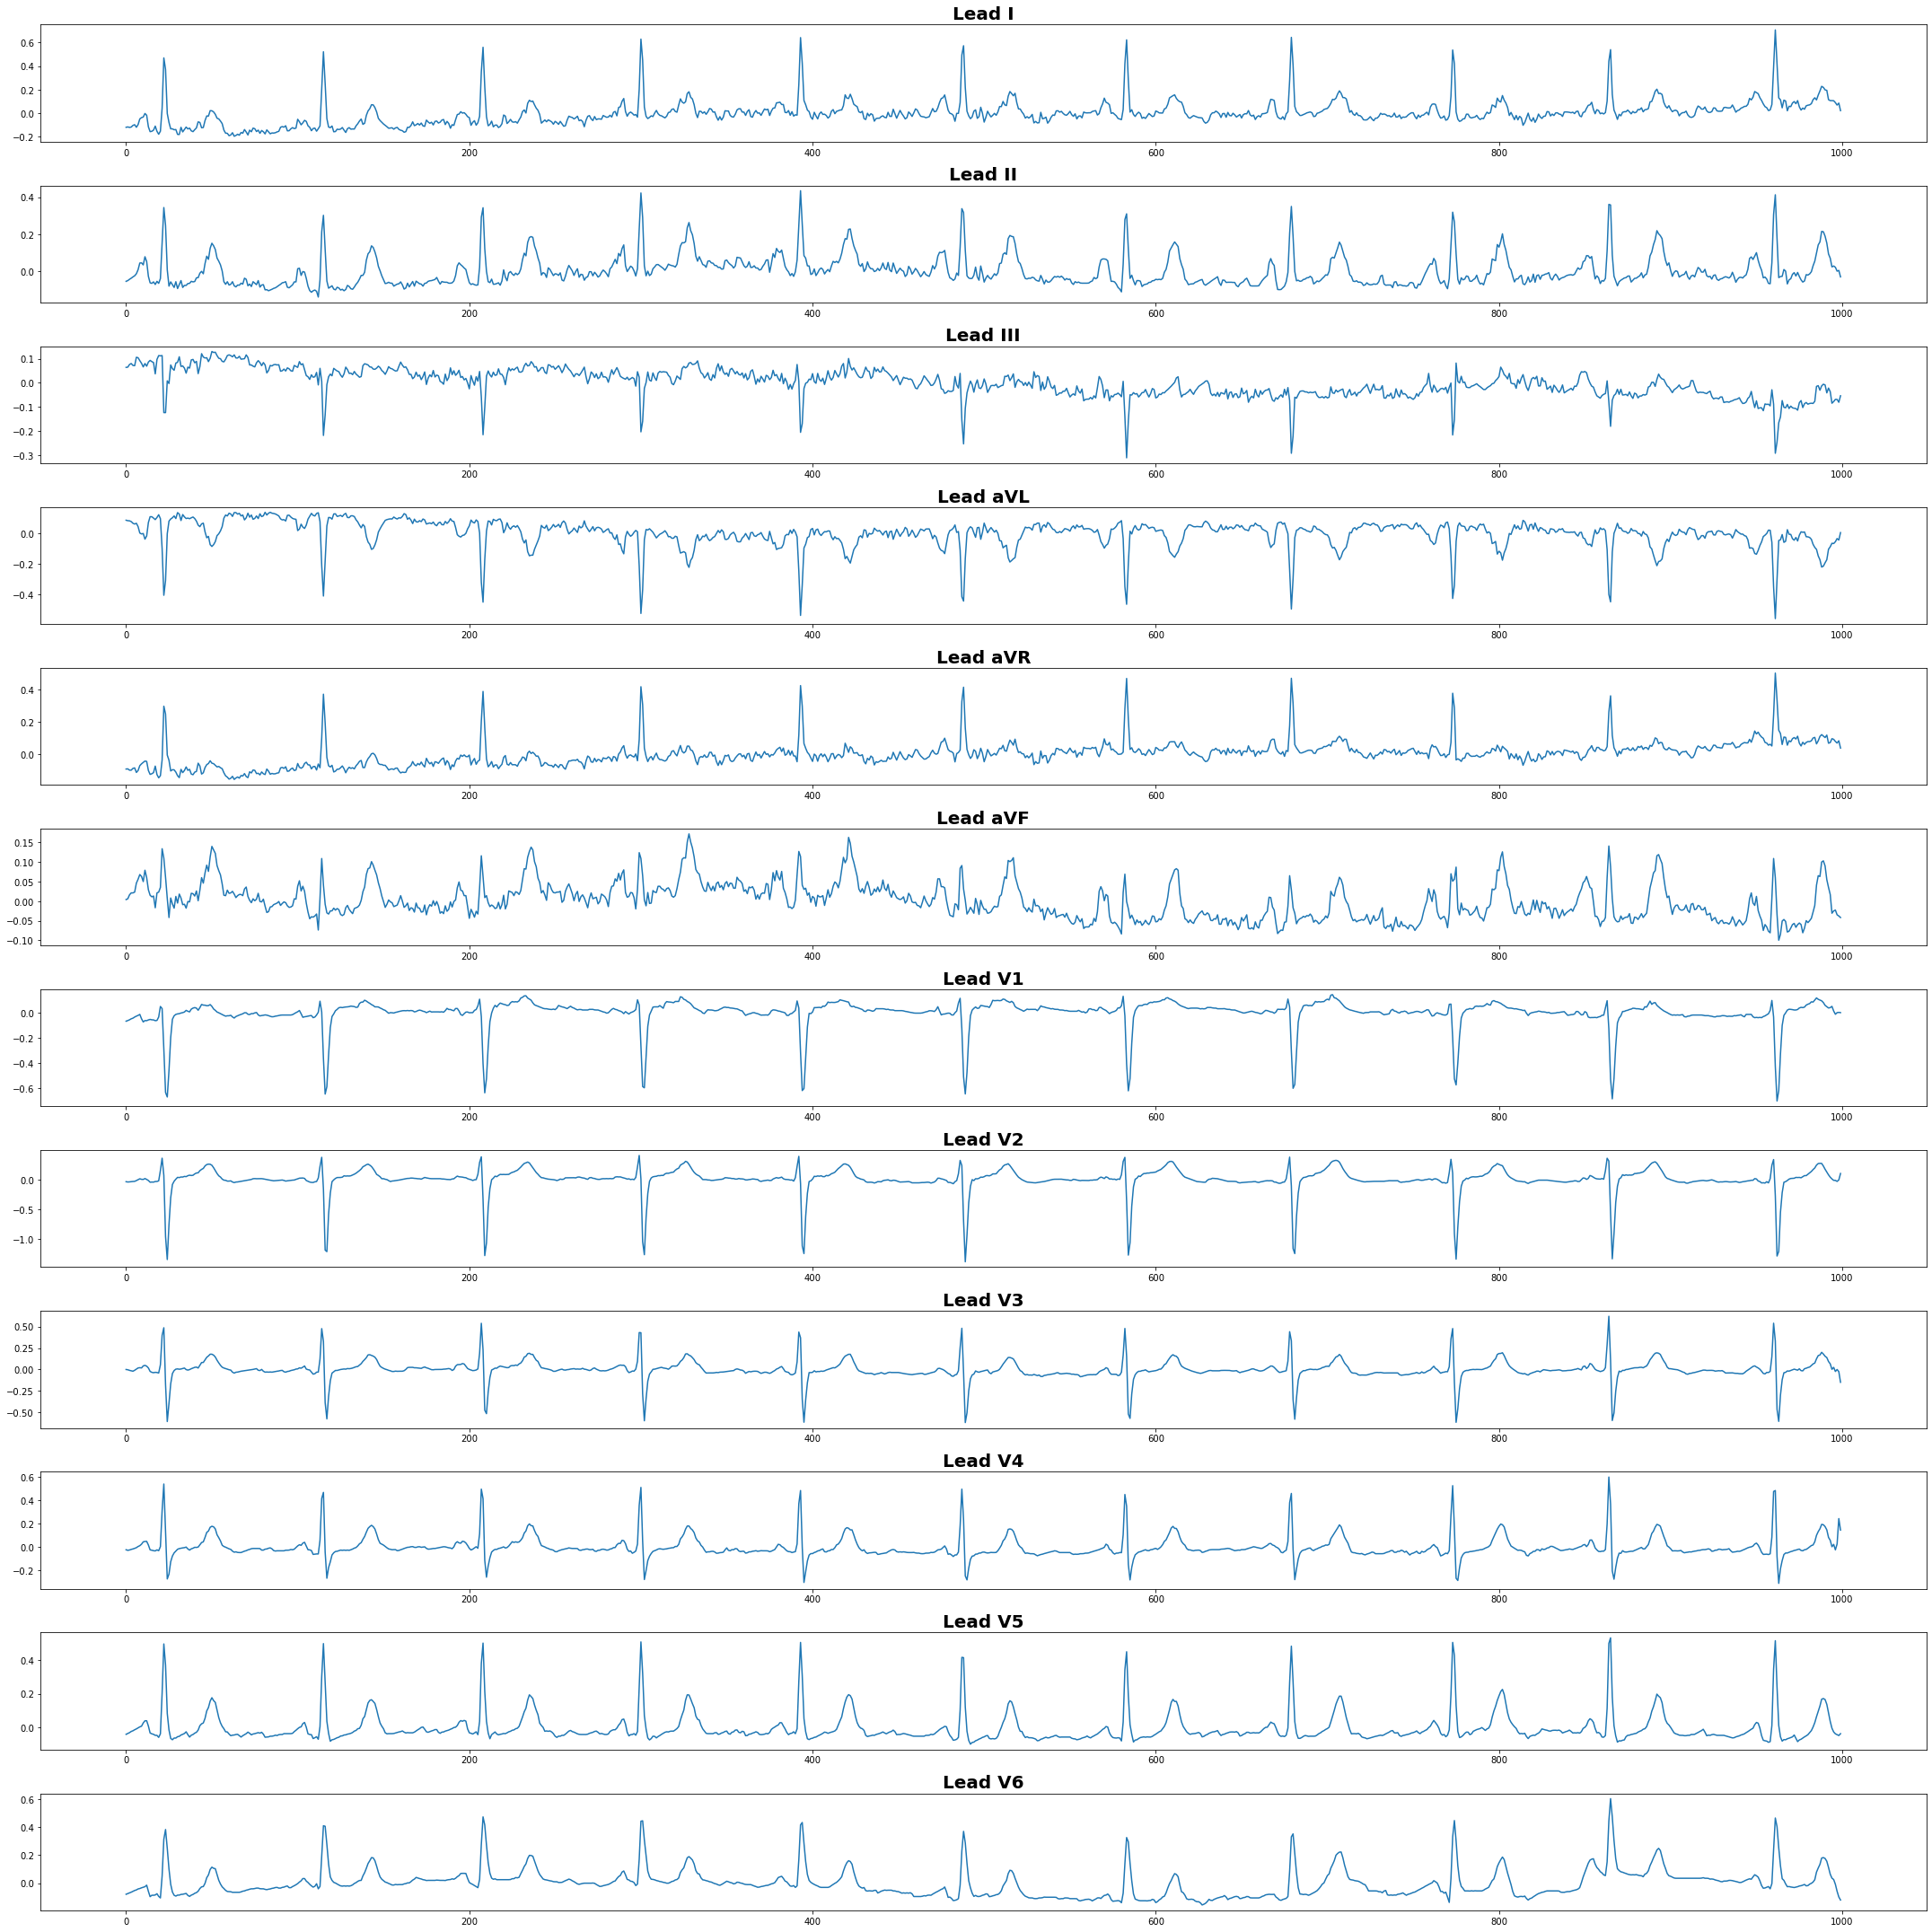

In [71]:
show_waveform(ecg)

# score

In [77]:
df_Y

,patient_id,age,sex,height,weight,recording_date,scp_codes,diagnosis,filename_lr
0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",['NORM'],records100/00000/00001_lr
1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,"{'NORM': 80.0, 'SBRAD': 0.0}",['NORM'],records100/00000/00002_lr
2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00003_lr
3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00004_lr
4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/00000/00005_lr
...,...,...,...,...,...,...,...,...,...
21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",['NDT'],records100/21000/21833_lr
21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",['NORM'],records100/21000/21834_lr
21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,"{'ISCAS': 50.0, 'SR': 0.0}",['ISCAS'],records100/21000/21835_lr
21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,"{'NORM': 100.0, 'SR': 0.0}",['NORM'],records100/21000/21836_lr


In [78]:
df_Y['filename_lr'].nunique()

21837

In [79]:
df_scp = df_Y[['scp_codes', 'filename_lr']]
df_scp.head()

,scp_codes,filename_lr
0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records100/00000/00001_lr
1,"{'NORM': 80.0, 'SBRAD': 0.0}",records100/00000/00002_lr
2,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00003_lr
3,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00004_lr
4,"{'NORM': 100.0, 'SR': 0.0}",records100/00000/00005_lr


In [80]:
new_dir = '/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_XL/PTB-XL_challenge/'

In [22]:
master = pd.read_csv(new_dir + 'ptbxl_MasterTable.csv')
master.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,confirm_state,diagnostic_subclass,...,LMI,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],['NORM'],...,0,0,1,0,0,0,0,0,0,0
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],['NORM'],...,0,0,1,0,0,0,0,0,0,0
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],['NORM'],...,0,0,1,0,0,0,0,0,0,0
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],['NORM'],...,0,0,1,0,0,0,0,0,0,0
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],['NORM'],...,0,0,1,0,0,0,0,0,0,0


In [8]:
master.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight',
       'recording_date', 'filename_lr', 'confirm_state', 'diagnostic_subclass',
       'AMI', 'CLBBB', 'CRBBB', 'ILBBB', 'IMI', 'IRBBB', 'ISCA', 'ISCI',
       'IVCD', 'LAFB/LPFB', 'LAO/LAE', 'LMI', 'LVH', 'NORM', 'PMI', 'RAO/RAE',
       'RVH', 'SEHYP', 'STTC', 'WPW', '_AVB'],
      dtype='object')

In [23]:
df_m = master.drop(['confirm_state'], axis=1)
df_m.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LMI,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,0,1,0,0,0,0,0,0,0
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,0,1,0,0,0,0,0,0,0
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,0,1,0,0,0,0,0,0,0
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,0,1,0,0,0,0,0,0,0
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
df = pd.merge(df_m, df_scp, how='inner', on='filename_lr')
df.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,scp_codes
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,1,0,0,0,0,0,0,0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,1,0,0,0,0,0,0,0,"{'NORM': 80.0, 'SBRAD': 0.0}"
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,1,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,1,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,1,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"


In [ ]:
if key in df.loc[idx, 'diagnostic_subclass']:
            df.loc[idx, key] = value

In [84]:
# scp_codes의 key 값을 subgrouping 
#agg_df : index를 diagnostic_subclass로 매핑
for idx in range(len(df)):
    dic = df.loc[idx,'scp_codes']
    dic = ast.literal_eval(dic)
    for key, value in dic.items():
        if (key in agg_df.index) & (value != 0):
            sub = agg_df.loc[key].diagnostic_subclass
            df.loc[idx, sub] = value

In [85]:
df

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,scp_codes
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,80,0,0,0,0,0,0,0,"{'NORM': 80.0, 'SBRAD': 0.0}"
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,['STTC'],0,...,0,0,0,0,0,0,100,0,0,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST..."
21376,21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
21377,21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,['ISCA'],0,...,0,0,0,0,0,0,0,0,0,"{'ISCAS': 50.0, 'SR': 0.0}"
21378,21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"


In [114]:
ls = []
idx_ls = []
for idx in range(len(df)):
    dic = df.loc[idx,'scp_codes']
    dic = ast.literal_eval(dic)
    n = []
    a=0
    for key in dic:
        if key in agg_df.index:
            ns = agg_df.loc[key].diagnostic_subclass
            if ns in n:
                a+=1
                n.append(ns)
    ls.append(a)
    idx_ls.append(idx)

In [115]:
len(ls)

21380

In [118]:
ss = []
for i in ls:
    if i < 1:
        ss.append(i)
        
len(ss)

21380

In [113]:
df[df.index.isin(idx_ls)]

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,scp_codes
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,80,0,0,0,0,0,0,0,"{'NORM': 80.0, 'SBRAD': 0.0}"
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,['STTC'],0,...,0,0,0,0,0,0,100,0,0,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST..."
21376,21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
21377,21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,['ISCA'],0,...,0,0,0,0,0,0,0,0,0,"{'ISCAS': 50.0, 'SR': 0.0}"
21378,21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"


In [121]:
df.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight',
       'recording_date', 'filename_lr', 'diagnostic_subclass', 'AMI', 'CLBBB',
       'CRBBB', 'ILBBB', 'IMI', 'IRBBB', 'ISCA', 'ISCI', 'IVCD', 'LAFB/LPFB',
       'LAO/LAE', 'LMI', 'LVH', 'NORM', 'PMI', 'RAO/RAE', 'RVH', 'SEHYP',
       'STTC', 'WPW', '_AVB', 'scp_codes'],
      dtype='object')

In [122]:
check_df = df[['filename_lr', 'diagnostic_subclass', 'AMI', 'CLBBB',
       'CRBBB', 'ILBBB', 'IMI', 'IRBBB', 'ISCA', 'ISCI', 'IVCD', 'LAFB/LPFB',
       'LAO/LAE', 'LMI', 'LVH', 'NORM', 'PMI', 'RAO/RAE', 'RVH', 'SEHYP',
       'STTC', 'WPW', '_AVB', 'scp_codes']]
check_df

,filename_lr,diagnostic_subclass,AMI,CLBBB,CRBBB,ILBBB,IMI,IRBBB,ISCA,ISCI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,scp_codes
0,records100/00000/00001_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"
1,records100/00000/00002_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,80,0,0,0,0,0,0,0,"{'NORM': 80.0, 'SBRAD': 0.0}"
2,records100/00000/00003_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
3,records100/00000/00004_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
4,records100/00000/00005_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,records100/21000/21833_lr,['STTC'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100,0,0,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST..."
21376,records100/21000/21834_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
21377,records100/21000/21835_lr,['ISCA'],0,0,0,0,0,0,50,0,...,0,0,0,0,0,0,0,0,0,"{'ISCAS': 50.0, 'SR': 0.0}"
21378,records100/21000/21836_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"


In [123]:
check_df.iloc[20:40]

,filename_lr,diagnostic_subclass,AMI,CLBBB,CRBBB,ILBBB,IMI,IRBBB,ISCA,ISCI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,scp_codes
20,records100/00000/00025_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
21,records100/00000/00026_lr,['STTC'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100,0,0,"{'NST_': 100.0, 'DIG': 100.0, 'SR': 0.0}"
22,records100/00000/00027_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,80,0,0,0,0,0,0,0,"{'NORM': 80.0, 'SR': 0.0}"
23,records100/00000/00028_lr,['STTC'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100,0,0,"{'NST_': 100.0, 'DIG': 100.0, 'SR': 0.0}"
24,records100/00000/00029_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
25,records100/00000/00030_lr,['LVH'],0,0,0,0,0,0,0,0,...,100,0,0,0,0,0,0,0,0,"{'LVH': 100.0, 'SR': 0.0}"
26,records100/00000/00031_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
27,records100/00000/00032_lr,['LAFB/LPFB'],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"{'LPFB': 100.0, 'SR': 0.0}"
28,records100/00000/00033_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
29,records100/00000/00035_lr,['NORM'],0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"


In [136]:
df.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,scp_codes
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,80,0,0,0,0,0,0,0,"{'NORM': 80.0, 'SBRAD': 0.0}"
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,"{'NORM': 100.0, 'SR': 0.0}"


---

In [139]:
df.columns

Index(['ecg_id', 'patient_id', 'age', 'sex', 'height', 'weight',
       'recording_date', 'filename_lr', 'diagnostic_subclass', 'AMI', 'CLBBB',
       'CRBBB', 'ILBBB', 'IMI', 'IRBBB', 'ISCA', 'ISCI', 'IVCD', 'LAFB/LPFB',
       'LAO/LAE', 'LMI', 'LVH', 'NORM', 'PMI', 'RAO/RAE', 'RVH', 'SEHYP',
       'STTC', 'WPW', '_AVB', 'scp_codes'],
      dtype='object')

In [143]:
sub = ['NORM', 'LAFB/LPFB', 'IRBBB', 'ILBBB','CLBBB','CRBBB','_AVB','IVCD','WPW','LVH','RVH', 'LAO/LAE', 'RAO/RAE','SEHYP','AMI', 'IMI','LMI','PMI','ISCA', 'ISCI','STTC']
len(sub)

21

In [145]:
cdf = df[sub]

In [146]:
cdf.head()

,NORM,LAFB/LPFB,IRBBB,ILBBB,CLBBB,CRBBB,_AVB,IVCD,WPW,LVH,...,LAO/LAE,RAO/RAE,SEHYP,AMI,IMI,LMI,PMI,ISCA,ISCI,STTC
0,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
cdf.loc[1, :].to_numpy()

array([80,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [160]:
labels = []
for i in range(len(df)):
    label = cdf.loc[i,:].to_numpy()
    labels.append(label)

In [163]:
labels = np.array(labels)

In [165]:
cdf.columns

Index(['NORM', 'LAFB/LPFB', 'IRBBB', 'ILBBB', 'CLBBB', 'CRBBB', '_AVB', 'IVCD',
       'WPW', 'LVH', 'RVH', 'LAO/LAE', 'RAO/RAE', 'SEHYP', 'AMI', 'IMI', 'LMI',
       'PMI', 'ISCA', 'ISCI', 'STTC'],
      dtype='object')

In [164]:
labels.shape

(21380, 21)

In [167]:
# save the y_dataset 
#np.save('/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_XL/PTB-XL_challenge/ptbxl_Y.npy',labels)

In [169]:
df = df.drop(['scp_codes'], axis=1)
df.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LMI,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,0,80,0,0,0,0,0,0,0
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0


In [173]:
df.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LMI,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,0,80,0,0,0,0,0,0,0
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0


In [53]:
new_dir = '/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_XL/PTB-XL_challenge/'

In [174]:
# save the label table
df.to_csv(new_dir+'ptbxl_MasterTable.csv', index=False)

In [176]:
# check
df.loc[173]

ecg_id                                       180
patient_id                               21551.0
age                                         73.0
sex                                            0
height                                       NaN
weight                                       NaN
recording_date               1986-03-16 08:17:31
filename_lr            records100/00000/00181_lr
diagnostic_subclass       ['STTC', 'AMI', 'IMI']
AMI                                          100
CLBBB                                          0
CRBBB                                          0
ILBBB                                          0
IMI                                           15
IRBBB                                          0
ISCA                                           0
ISCI                                           0
IVCD                                           0
LAFB/LPFB                                      0
LAO/LAE                                        0
LMI                 

---

In [179]:
df.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LMI,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,0,80,0,0,0,0,0,0,0
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,0,100,0,0,0,0,0,0,0


In [181]:
df_total.columns

Index(['patient_id', 'age', 'sex', 'height', 'weight', 'nurse', 'site',
       'device', 'recording_date', 'report', 'scp_codes', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker', 'strat_fold', 'filename_lr', 'filename_hr',
       'diagnostic_superclass', 'diagnosis'],
      dtype='object')

In [182]:
df_fold = df_total[['filename_lr','strat_fold']]
df_fold.head()

,filename_lr,strat_fold
0,records100/00000/00001_lr,3
1,records100/00000/00002_lr,2
2,records100/00000/00003_lr,5
3,records100/00000/00004_lr,3
4,records100/00000/00005_lr,4


In [187]:
fin = pd.merge(df, df_fold, on='filename_lr')
fin.head()

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,strat_fold
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,3
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,80,0,0,0,0,0,0,0,2
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,5
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,3
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,4


In [188]:
X = np.load(new_dir + 'ptbxl_X.npy')

In [192]:
X.shape

(21380, 1000, 12)

In [193]:
labels.shape

(21380, 21)

In [198]:
fin.loc[fin['strat_fold']==9]

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,strat_fold


In [197]:
fin.loc[fin['strat_fold']==9, 'strat_fold']= 10
fin

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,strat_fold
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,3
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,80,0,0,0,0,0,0,0,2
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,5
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,3
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,['STTC'],0,...,0,0,0,0,0,0,100,0,0,7
21376,21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,4
21377,21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,['ISCA'],0,...,0,0,0,0,0,0,0,0,0,2
21378,21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,8


In [200]:
# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(fin.strat_fold != test_fold)]
Y_train = labels[np.where(fin.strat_fold != test_fold)]
# Test
X_test = X[np.where(fin.strat_fold == test_fold)]
Y_test = labels[np.where(fin.strat_fold == test_fold)]

In [210]:
print('X_train: {}\nY_train: {}\nX_test: {}\nY_test: {}'.format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X_train: (17079, 1000, 12)
Y_train: (17079, 21)
X_test: (4301, 1000, 12)
Y_test: (4301, 21)


In [207]:
np.save(new_dir+'X_train', X_train)
np.save(new_dir+'Y_train', Y_train)
np.save(new_dir+'X_test', X_test)
np.save(new_dir+'Y_test', Y_test)

In [204]:
df_test = fin.loc[fin['strat_fold']==10]
df_train = fin.loc[fin['strat_fold']!=10]

In [205]:
print(df_train.shape)
print(df_test.shape)

(17079, 31)
(4301, 31)


In [213]:
df_train = df_train.drop(['strat_fold'], axis=1)
df_test = df_test.drop(['strat_fold'], axis=1)
print(df_train.shape, df_test.shape)

(17079, 30) (4301, 30)


In [214]:
df_train.to_csv(new_dir+'Train_mastertable.csv', index=False)
df_test.to_csv(new_dir+'Test_mastertable.csv', index=False)

In [215]:
fin

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,strat_fold
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,3
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,80,0,0,0,0,0,0,0,2
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,5
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,3
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,['STTC'],0,...,0,0,0,0,0,0,100,0,0,7
21376,21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,4
21377,21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,['ISCA'],0,...,0,0,0,0,0,0,0,0,0,2
21378,21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,8


In [216]:
fin.loc[fin['strat_fold']!=10, 'strat_fold']= 'Train'
fin.loc[fin['strat_fold']==10, 'strat_fold']= 'Test'

In [217]:
fin

,ecg_id,patient_id,age,sex,height,weight,recording_date,filename_lr,diagnostic_subclass,AMI,...,LVH,NORM,PMI,RAO/RAE,RVH,SEHYP,STTC,WPW,_AVB,strat_fold
0,0,15709.0,56.0,1,NaN,63.0,1984-11-09 09:17:34,records100/00000/00001_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,Train
1,1,13243.0,19.0,0,NaN,70.0,1984-11-14 12:55:37,records100/00000/00002_lr,['NORM'],0,...,0,80,0,0,0,0,0,0,0,Train
2,2,20372.0,37.0,1,NaN,69.0,1984-11-15 12:49:10,records100/00000/00003_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,Train
3,3,17014.0,24.0,0,NaN,82.0,1984-11-15 13:44:57,records100/00000/00004_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,Train
4,4,17448.0,19.0,1,NaN,70.0,1984-11-17 10:43:15,records100/00000/00005_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,21832,17180.0,67.0,1,NaN,NaN,2001-05-31 09:14:35,records100/21000/21833_lr,['STTC'],0,...,0,0,0,0,0,0,100,0,0,Train
21376,21833,20703.0,93.0,0,NaN,NaN,2001-06-05 11:33:39,records100/21000/21834_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,Train
21377,21834,19311.0,59.0,1,NaN,NaN,2001-06-08 10:30:27,records100/21000/21835_lr,['ISCA'],0,...,0,0,0,0,0,0,0,0,0,Train
21378,21835,8873.0,64.0,1,NaN,NaN,2001-06-09 18:21:49,records100/21000/21836_lr,['NORM'],0,...,0,100,0,0,0,0,0,0,0,Train


In [218]:
fin.to_csv(new_dir+'Total_mastertable.csv', index=False)

---

In [38]:
for idx in range(len(df)):
    if idx < 10:        
        dic = df.loc[idx,'scp_codes']
        dic = ast.literal_eval(dic)
        print(dic)

{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
{'NORM': 80.0, 'SBRAD': 0.0}
{'NORM': 100.0, 'SR': 0.0}
{'NORM': 100.0, 'SR': 0.0}
{'NORM': 100.0, 'SR': 0.0}
{'NORM': 100.0, 'SR': 0.0}
{'NORM': 100.0, 'SR': 0.0}
{'IMI': 35.0, 'ABQRS': 0.0, 'SR': 0.0}
{'NORM': 100.0, 'SR': 0.0}
{'NORM': 100.0, 'SR': 0.0}


In [40]:
for key, value in {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}.items():
    print(key)

NORM
LVOLT
SR


In [41]:
for idx in range(len(df)):
    dic = df.loc[idx,'scp_codes']
    dic = ast.literal_eval(dic)
    for key, value in dic.items():
        if key in df.loc[idx, 'diagnostic_subclass']:
            df.loc[idx, key] = value

In [52]:
df.loc[21358]

ecg_id                                                             21814
patient_id                                                       14433.0
age                                                                 82.0
sex                                                                    1
height                                                               NaN
weight                                                               NaN
recording_date                                       2001-02-25 10:58:58
filename_lr                                    records100/21000/21815_lr
diagnostic_subclass                  ['LAFB/LPFB', 'AMI', 'IMI', '_AVB']
AMI                                                                   50
CLBBB                                                                  0
CRBBB                                                                  0
ILBBB                                                                  0
IMI                                                